In [1]:
# Removing row with NaN value in Details column
import pandas as pd

data = pd.read_csv('C:\Degree\Sem 6\CSC650\FYP - Text Classification\Dataset\data1.2.csv')
data_cleaned = data.dropna(subset=['Details'])

# Sort the DataFrame by the 'Place' column
data_cleaned_sorted = data_cleaned.sort_values(by='Place', ascending=True)

# Save the sorted DataFrame to a new CSV file
data_cleaned_sorted.to_csv('data1.3.csv', index=False)

# Display the first 2 rows of the sorted DataFrame
print(data_cleaned_sorted.head(2))

                                Place  \
90   "The Song of Everlasting Sorrow"   
198              25th of April Bridge   

                                               Details         Class  
90   "Song of Everlasting Sorrow" is a historical d...  None Related  
198  On April 25, the bridge spanned both sides of ...  None Related  


# From data1.3.csv
## Clean data using NLTK
#

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (run only once)
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to C:\Users\ASUS
[nltk_data]     TUF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ASUS
[nltk_data]     TUF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
data = pd.read_csv('data1.3.csv')

# Function for cleaning text data
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Causing lots of word missing alphabet
    # Stemming (optional)
    # porter = PorterStemmer()
    # tokens = [porter.stem(word) for word in tokens]

    # Join the tokens back into a string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [4]:
# Apply the cleaning function to the 'Details' column
data['Cleaned_Details'] = data['Details'].apply(clean_text)


In [5]:
# Display the updated DataFrame
print(data)

data.to_csv('data1.4.csv')

                                 Place  \
0     "The Song of Everlasting Sorrow"   
1                 25th of April Bridge   
2                 25th of April Bridge   
3                         3D Black Art   
4                             3billion   
...                                ...   
1128                               Zug   
1129                            iRobot   
1130                          old nice   
1131                               Èze   
1132                     Île aux Cerfs   

                                                Details          Class  \
0     "Song of Everlasting Sorrow" is a historical d...   None Related   
1     On April 25, the bridge spanned both sides of ...   None Related   
2     On April 25, the bridge spanned both sides of ...   None Related   
3     Myeongdong 3D Art Museum uses ultra-realistic ...   None Related   
4     Company that offers genetic testing for rare d...  bioinformatic   
...                                                

# From data1.4.csv
## Read Place and Cleaned_details()
#

In [6]:
import pandas as pd

data = pd.read_csv('data1.4.csv')
column_to_read = ['Place', 'Cleaned_Details', 'Class']
selected = data[column_to_read].copy()
selected.rename(columns={'Cleaned_Details': "Details"}, inplace=True)
# selected.to_csv('data1.5.csv', index=False)
print(selected)

                                 Place  \
0     "The Song of Everlasting Sorrow"   
1                 25th of April Bridge   
2                 25th of April Bridge   
3                         3D Black Art   
4                             3billion   
...                                ...   
1128                               Zug   
1129                            iRobot   
1130                          old nice   
1131                               Èze   
1132                     Île aux Cerfs   

                                                Details          Class  
0     song everlasting sorrow historical drama adapt...   None Related  
1     april 25 bridge spanned sides tejo river conne...   None Related  
2     april 25 bridge spanned sides tejo river conne...   None Related  
3     myeongdong 3d art museum uses 3d dislocation p...   None Related  
4     company offers genetic testing rare diseases m...  bioinformatic  
...                                                 ...  

# data1.5.csv
## Tokenize Details
#

In [7]:
import nltk
from nltk.tokenize import word_tokenize

# Sample DataFrame
# data = pd.read_csv('data1.5.csv')
column_to_read = ['Place', 'Details', 'Class']
selected = selected[column_to_read].copy()

# Tokenize the 'Details' column
selected['Tokenized_Details'] = selected['Details'].apply(word_tokenize)

# Display the DataFrame with tokenized details
print(selected[['Place', 'Tokenized_Details','Class']].head(3))

# selected.to_csv('data1.6.csv')


                              Place  \
0  "The Song of Everlasting Sorrow"   
1              25th of April Bridge   
2              25th of April Bridge   

                                   Tokenized_Details         Class  
0  [song, everlasting, sorrow, historical, drama,...  None Related  
1  [april, 25, bridge, spanned, sides, tejo, rive...  None Related  
2  [april, 25, bridge, spanned, sides, tejo, rive...  None Related  


# data1.6.csv
## Read Place and Tokenized_details()
#

In [8]:
column_to_read = ['Place', 'Tokenized_Details', 'Class']
selected = selected[column_to_read].copy()
selected.rename(columns={'Tokenized_Details': "Details"}, inplace=True)
selected.to_csv('data1.7.csv', index=False)
selected.head(3)

,Place,Details,Class
0,"""The Song of Everlasting Sorrow""","[song, everlasting, sorrow, historical, drama,...",None Related
1,25th of April Bridge,"[april, 25, bridge, spanned, sides, tejo, rive...",None Related
2,25th of April Bridge,"[april, 25, bridge, spanned, sides, tejo, rive...",None Related


In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming 'Details' column contains lists
# selected['WordCount'] = selected['Details'].apply(lambda x: len(' '.join(x).split()))

# # Plot the distribution
# plt.figure(figsize=(10, 6))
# sns.histplot(selected['WordCount'], bins=50, kde=True)
# plt.title('Distribution of Word Counts in Details')
# plt.xlabel('Word Count')
# plt.ylabel('Frequency')
# plt.show()



In [10]:
import spacy
import pandas as pd
from collections import Counter

# Assuming you have already loaded your data and spaCy model
data = pd.read_csv('data1.7.csv')
nlp = spacy.load("en_core_web_sm")

# Concatenate 'Place' and 'Details' columns
column_to_read = data['Details']

# Apply SpaCy pipeline to each text in the column
docs = column_to_read.apply(nlp)

# Calculate word counts
data['WordCount'] = docs.apply(lambda doc: len(doc))

# Max, Min, and Average Word Counts
max_word_count = data['WordCount'].max()
min_word_count = data['WordCount'].min()
avg_word_count = data['WordCount'].mean()

print(f"Maximum Word Count: {max_word_count}")
print(f"Minimum Word Count: {min_word_count}")
print(f"Average Word Count: {avg_word_count}")

# Most Common Words
all_words = ' '.join(column_to_read).split()
word_counts = Counter(all_words)

# Print most common words
most_common_words = word_counts.most_common(10)
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count} times")

# Rank Entity Locations
entity_locations = []
for doc in docs:
    entity_locations.extend([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

ranked_locations = Counter(entity_locations).most_common()
print("Ranked Entity Locations:")
for location, count in ranked_locations:
    print(f"{location}: {count} times")


Maximum Word Count: 2933
Minimum Word Count: 29
Average Word Count: 324.89585172109446
Most Common Words:
'also',: 852 times
'located',: 447 times
'many',: 436 times
'one',: 411 times
'lake',: 386 times
'park',: 383 times
'world',: 361 times
'city',: 357 times
'museum',: 350 times
'island',: 330 times
Ranked Entity Locations:
paris: 100 times
china: 49 times
france: 41 times
rome: 37 times
tokyo: 35 times
italy: 30 times
malaysia: 29 times
japan: 23 times
egypt: 18 times
brazil: 18 times
shanghai: 14 times
venice: 12 times
india: 10 times
cairo: 9 times
germany: 8 times
jakarta: 7 times
wellington: 6 times
morocco: 5 times
london: 5 times
kenya: 4 times
pathai: 3 times
boston: 3 times
navona: 3 times
spain: 2 times
poland: 2 times
colorado: 2 times
guangzhou: 2 times
california: 2 times
berisha: 2 times
cheguri: 2 times
hemophilia: 1 times
virginia: 1 times
denver: 1 times
namibia: 1 times
taiwan: 1 times
lamington: 1 times
pakistan: 1 times
anesthesia: 1 times
singapore: 1 times
neura

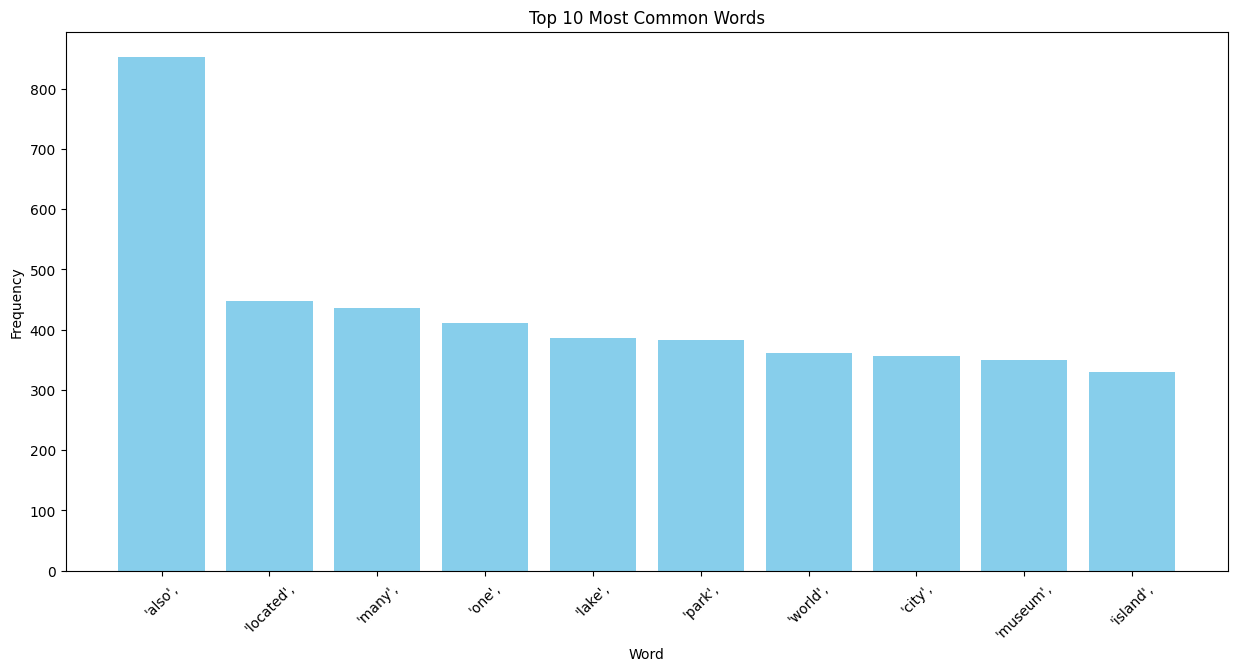

In [11]:
import matplotlib.pyplot as plt
import joblib
from collections import Counter

# Most Common Words
plt.figure(figsize=(15, 7))
plt.bar(*zip(*most_common_words), color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()






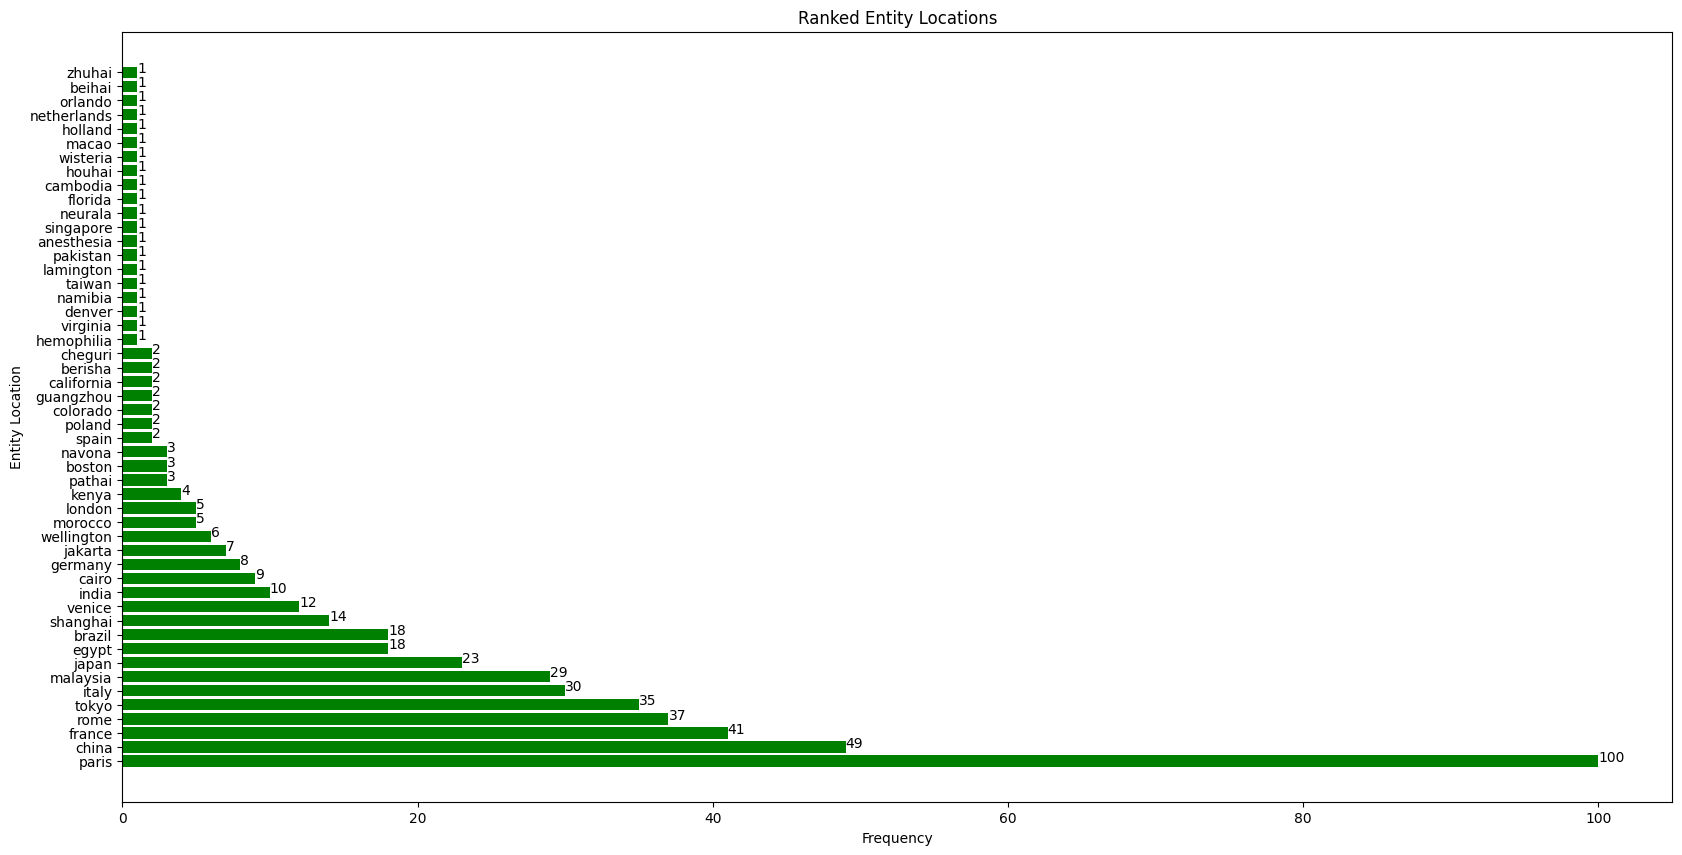

In [12]:
import matplotlib.pyplot as plt 
from collections import Counter



# Rank Entity Locations
plt.figure(figsize=(20, 10))
locations, counts = zip(*ranked_locations)
plt.barh(locations, counts, color='green')
plt.title('Ranked Entity Locations')
plt.xlabel('Frequency')
plt.ylabel('Entity Location')

# Add frequency values to each bar
for index, value in enumerate(counts):
    plt.text(value, index, str(value))
    
plt.show()



In [13]:
import os
import pickle

# Assuming you have a variable named 'ranked_locations' with the data you want to save

# Save data separately
with open("ranked_locations.pkl", "wb") as f:
    pickle.dump(ranked_locations, f)


In [14]:
# # KIV getting Learning to rank algorithm to replace this 
# #
# #


# import pandas as pd
# import spacy
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# # Load spaCy model
# nlp = spacy.load("en_core_web_sm")

# # Sample DataFrame
# data = pd.read_csv('data1.7.csv')

# # Choose a reference word
# reference_word = "example"

# # Function to calculate similarity between two words
# def calculate_similarity(word1, word2):
#     return nlp(word1).similarity(nlp(word2))

# # Calculate similarity scores for each word in 'Details' with the reference word
# data['Similarity'] = data['Details'].apply(lambda details: calculate_similarity(reference_word, details))

# # Manually assign ranking labels based on similarity scores (modify as needed)
# data['Ranking_Label'] = data['Similarity'].rank(ascending=False)

# # Prepare the data for learning-to-rank
# X = data[['Similarity']]
# y = data['Ranking_Label']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a learning-to-rank model (Random Forest Regressor in this example)
# model = RandomForestRegressor()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print(f'Mean Squared Error: {mse}')

# # Rank the words based on the learned model
# data['Predicted_Rank'] = model.predict(X)

# # Display the resulting DataFrame with similarity, manual rank, and predicted rank
# print(data[['Details', 'Similarity', 'Ranking_Label', 'Predicted_Rank']])


In [15]:
# import pandas as pd
# import spacy
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# # Load spaCy model
# nlp = spacy.load("en_core_web_sm")

# # Sample DataFrame
# data = pd.read_csv('data1.7.csv')

# # Word to compare similarity to
# comparison_word = "Paris"

# # Calculate similarity scores
# data['Similarity'] = data['Details'].apply(lambda details: nlp(details).similarity(nlp(comparison_word)))

# # Assign ranking labels
# data['Ranking_Label'] = data['Similarity'].rank(ascending=False)

# # Prepare data for learning-to-rank
# X = data[['Similarity']]
# y = data['Ranking_Label']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a learning-to-rank model (Random Forest Regressor in this example)
# model = RandomForestRegressor()
# model.fit(X_train, y_train)

# # Predict rankings on the test set
# predictions = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print(f'Mean Squared Error: {mse}')

# # Predict rankings for all data
# data['Predicted_Rank'] = model.predict(X)

# # Sort the DataFrame based on predicted rankings
# sorted_data = data.sort_values(by='Predicted_Rank')

# # Display the resulting DataFrame
# print(sorted_data[['Details', 'Similarity', 'Ranking_Label', 'Predicted_Rank']])


In [16]:
# from spacy import displacy

# # Assuming 'docs' is a list of SpaCy Doc objects
# for doc in docs:
#     displacy.render(doc, style="ent", jupyter=True)
